Classify the email using the binary classification method. Email Spam detection has two 
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
Support Vector Machine for classification. Analyze their performance.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\BE practicals\\ML\\emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
#count vectorization process-means counting repeated words by nlp
df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [5]:
 #input data
x = df.drop(['Email No.','Prediction'],axis=1)

#output data
y= df['Prediction']

In [6]:
x.shape

(5172, 3000)

In [7]:
#checking if all feilds are numerical or not

#set will show unique values
set(x.dtypes)

{dtype('int64')}

<AxesSubplot:xlabel='Prediction', ylabel='count'>

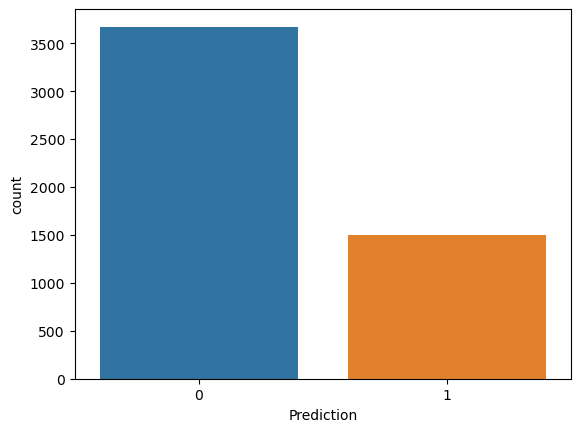

In [8]:
 #checking balance of spam and notspam
    
import seaborn as sns
sns.countplot(x=y)

#x is keyword agrument and we have passed value of y to it

In [9]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [10]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [11]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
#cross validation

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x_scaled,y,random_state=0,test_size=0.25)

In [13]:
x_scaled.shape

(5172, 3000)

In [14]:
x_train.shape

(3879, 3000)

In [15]:
x_test.shape

(1293, 3000)

In [16]:
#knn

#import the class

from sklearn.neighbors import KNeighborsClassifier


In [17]:
#create the object

knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
#train the algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
#predict oon the test data

y_pred = knn.predict(x_test) 

In [20]:
#import the evaluation metrics

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [22]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [23]:
accuracy_score(y_test,y_pred)

0.871616395978345

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [25]:
#for finding best value of k

import numpy as np
import matplotlib.pyplot as plt

In [26]:
error=[]
for k in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))

In [27]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

In [28]:
#lets put k=1 as error rate is min at 1 in list
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
#train the algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
y_pred = knn.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.8917246713070379

In [32]:
from sklearn.svm import SVC

In [33]:
svm= SVC(kernel='linear')

In [34]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
y_pred=svm.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9767981438515081

In [37]:
#linear svm=0.9767981438515081
#RBF
#poly
#sigmoid